In [ ]:
!pip install tensorflow matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 444 images belonging to 2 classes.
Found 111 images belonging to 2 classes.
Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 851ms/step - accuracy: 0.5105 - loss: 0.7030 - val_accuracy: 0.5045 - val_loss: 0.7058
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 309ms/step - accuracy: 0.5373 - loss: 0.6768 - val_accuracy: 0.4685 - val_loss: 0.7443
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 286ms/step - accuracy: 0.5827 - loss: 0.6779 - val_accuracy: 0.5766 - val_loss: 0.7465
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 292ms/step - accuracy: 0.6468 - loss: 0.6649 - val_accuracy: 0.5045 - val_loss: 0.8156
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step - accuracy: 0.5490 - loss: 0.6791 - val_accuracy: 0.5045 - val_loss: 0.7732
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.6195 - loss: 0.6853
Test Accuracy: 0.50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


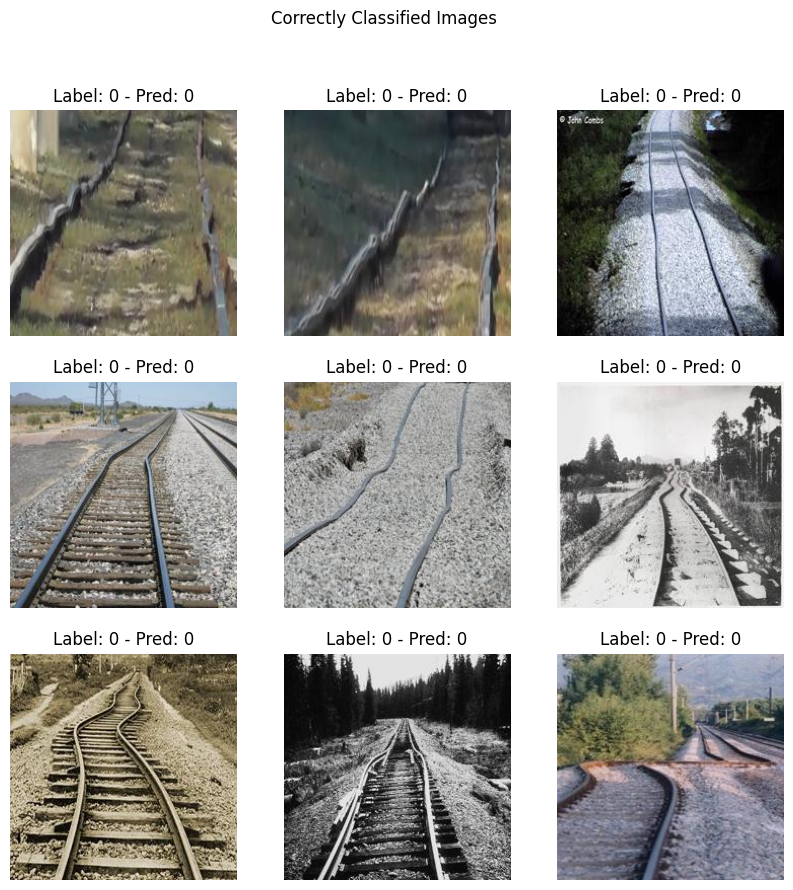

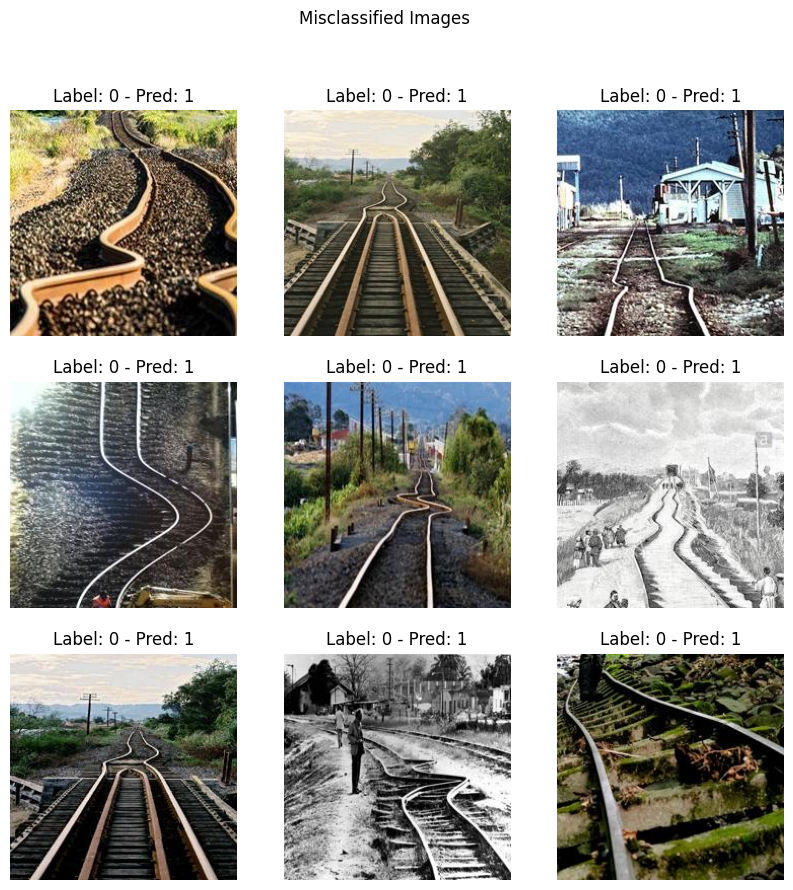

In [ ]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #For real-time data augmentation while training.
from tensorflow.keras.applications import ResNet50 #pre-trained model used
from tensorflow.keras.models import Sequential # for creating sequential neural netowork model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D #To define fully connected layers and pool features from output
from tensorflow.keras.optimizers import Adam #optimizer
import matplotlib.pyplot as plt
import numpy as np

# Define paths to dataset directories
train_dir = '/content/drive/MyDrive/NewR22/train'
test_dir = '/content/drive/MyDrive/NewR22/test'

# Image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, zoom_range=0.15, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training and test images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Loading the ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,  # Increase if necessary
    validation_data=test_generator
)

# evaluate model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictiction
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_generator.classes

# to identify correct and misclassified indices
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Function to display images (upto 9 images)
def display_images(generator, indices, title):
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(indices[:9]):
        # Retrieve the image and label from the generator based on the batch
        img, label = generator[idx // generator.batch_size][0][idx % generator.batch_size], generator[idx // generator.batch_size][1][idx % generator.batch_size]
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {int(label)} - Pred: {predicted_classes[idx]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display correct and misclassified images
display_images(test_generator, correct_indices, "Correctly Classified Images")
display_images(test_generator, incorrect_indices, "Misclassified Images")
